<a href="https://colab.research.google.com/github/rjrizani/machine-learning/blob/main/spam_detection_with_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
spam=pd.read_csv('/content/drive/MyDrive/brightcamp/python/Dataset/spam.csv')


In [5]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam.shape

(5572, 2)

In [7]:
spam.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
spam.columns=spam.columns.str.strip()    #It will remove whitespaces from columns

In [9]:
spam.columns=spam.columns.str.lower()        #It will converts string into lowercase

In [10]:
spam.columns # show all the column

Index(['category', 'message'], dtype='object')

In [11]:
spam.isna().sum() #show the null value

,0
category,0
message,0


In [12]:
spam[spam.duplicated(subset=['category','message'],keep=False)]               #check for duplicates

,category,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [13]:
spam.drop_duplicates(subset=['category','message'],keep='first',inplace=True)              #dropping duplicates permanently


In [14]:
spam.shape


(5157, 2)

In [15]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5157 non-null   object
 1   message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [16]:
spam['category'].value_counts().to_frame()


,count
category,
ham,4516
spam,641


In [17]:
spam.loc[spam['category']=='spam','category']=1
spam.loc[spam['category']=='ham','category']=0

In [18]:
spam['category']=spam['category'].astype('int64')

In [19]:
spam.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5157 non-null   int64 
 1   message   5157 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


<Axes: xlabel='category', ylabel='count'>

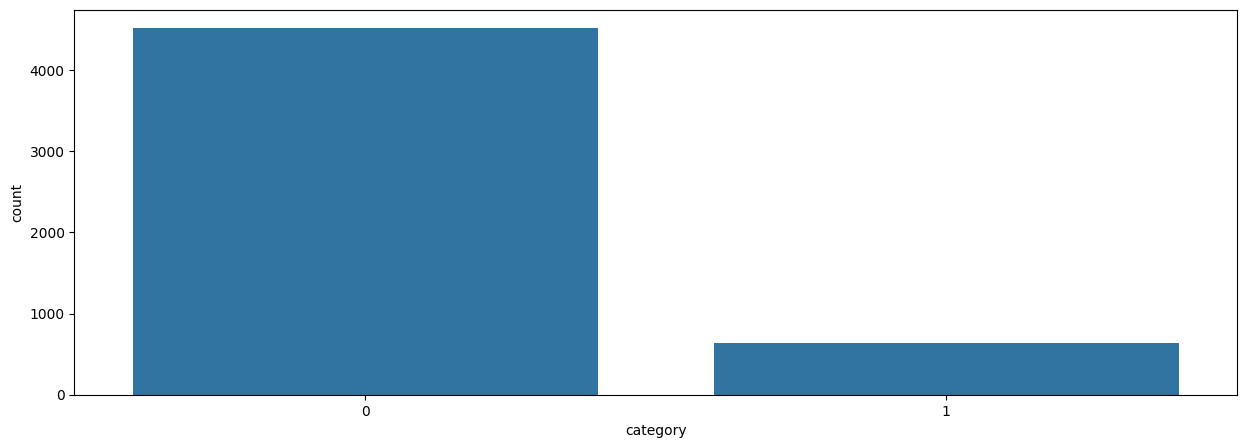

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(data=spam,x='category')

In [21]:
#End of session 1
#start of session 2

In [22]:
email1=spam[spam['category']==0]
email2=spam[spam['category']==1]

In [23]:
email1_sample = email1.sample(n=641, replace=False, random_state=42)

In [24]:
spamdata=pd.concat([email1_sample,email2])

In [25]:
spamdata['category'].value_counts().to_frame()

,count
category,
0,641
1,641


<Axes: xlabel='category', ylabel='count'>

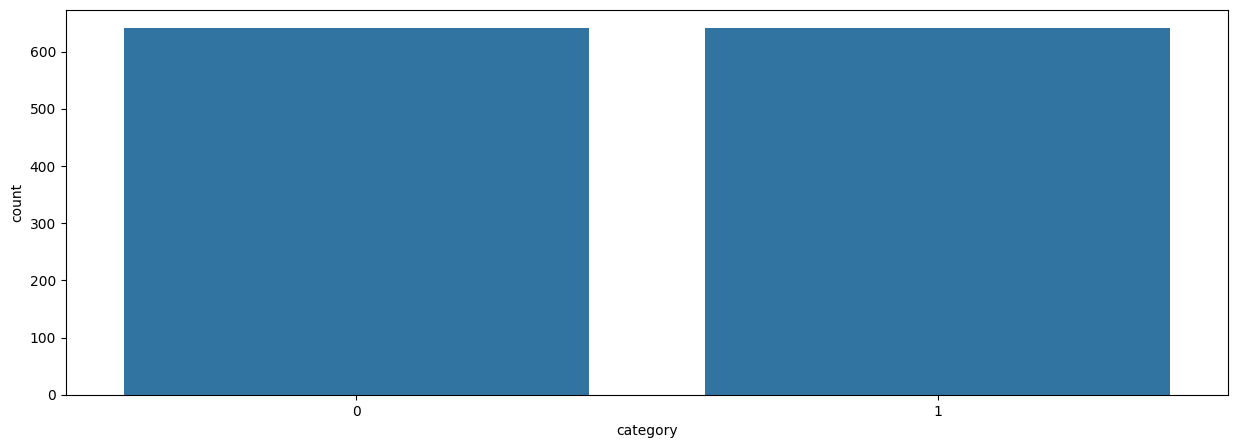

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(data=spamdata,x='category')

In [27]:
x=spamdata['message']
y=spamdata['category']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tf=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [32]:
x_train_tf=tf.fit_transform(x_train)
x_test_tf=tf.transform(x_test)

In [33]:
x_train_tf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9708 stored elements and shape (897, 3360)>

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression(max_iter=800)

In [36]:
lr.fit(x_train_tf,y_train)

LogisticRegression(max_iter=800)

In [37]:
lr.score(x_train_tf,y_train)

0.9888517279821628

In [38]:
lr.score(x_test_tf,y_test)

0.9506493506493506

In [39]:
y_predict=lr.predict(x_test_tf)

In [40]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [41]:
precision_score(y_test,y_predict)

0.9653179190751445

In [42]:
accuracy_score(y_test,y_predict)

0.9506493506493506

In [43]:
f1_score(y_test,y_predict)

0.9461756373937678

In [44]:
lr.classes_

array([0, 1])

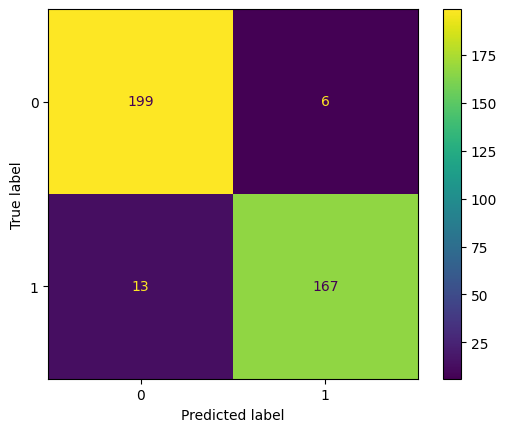

In [45]:
cm=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_predict,labels=lr.classes_),display_labels=lr.classes_)
cm.plot()

In [46]:
entermail=['Ok lar... Joking wif u oni...'] # input

In [47]:
checkmail=tf.transform(entermail)

In [48]:
predict=lr.predict(checkmail)
if predict==1:
    print('mail is spam')
else:
    print('mail is not spam')

mail is not spam
